In [9]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
from selenium import webdriver
from selenium.webdriver.chrome.options import Options

In [2]:
url = r'https://www.transfermarkt.mx/liga-mx-clausura/transfers/wettbewerb/MEX1/plus/?saison_id=2013&s_w=s&leihe=1&intern=0&intern=1'
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3"
}
response = requests.get(url, headers=headers)
soup = BeautifulSoup(response.content, 'html.parser')

In [3]:
tablas = soup.find_all('div', class_='box')

In [4]:
fichajes = []
for tabla in tablas[3:21]:
    tablas_responsiva = tabla.find_all('div', class_='responsive-table')
    equipo = tabla.find('img').get('alt')
    for tabla in tablas_responsiva:
        for fila in tabla.select('tr')[1:]:
            td_lista = []

            for i, td in enumerate(fila):
                if i % 2 != 0:
                    td_lista.append(td)
            fichajes.append({
                'Tipo de Fichaje': tabla.find('tr').find('th').text[:-1],
                'Equipo': equipo,
                'Nombre': td_lista[0].find('span', class_='hide-for-small').find('a').text,
                'Edad':int(td_lista[1].text),
                'Nacionalidad': td_lista[2].find('img').get('alt'),
                'Posición': td_lista[4].text,
                'Valor de mercado':td_lista[5].text,
                'Último club': td_lista[7].text,
                'Coste': td_lista[8].text
            })

In [5]:
df =  pd.DataFrame(fichajes)

In [6]:
df

,Tipo de Fichaje,Equipo,Nombre,Edad,Nacionalidad,Posición,Valor de mercado,Último club,Coste
0,Alta,Tiburones Rojos de Veracruz,Cristian Llama,27,Argentina,MCO,800 mil €,Catania,Libre
1,Alta,Tiburones Rojos de Veracruz,Melitón Hernández,30,México,POR,300 mil €,Pachuca,?
2,Alta,Tiburones Rojos de Veracruz,Leitón Jiménez,24,Colombia,CEN,1.00 mill. €,Chiapas FC,?
3,Alta,Tiburones Rojos de Veracruz,Juan Carlos Gómez,22,México,CEN,-,La Piedad,?
4,Alta,Tiburones Rojos de Veracruz,Leonín Pineda,27,México,POR,100 mil €,CF América,?
...,...,...,...,...,...,...,...,...,...
715,Baja,Deportivo Toluca FC,José Cruzalta,35,México,LD,-,Retirado,-
716,Baja,Deportivo Toluca FC,Xavier Báez,25,México,PIV,-,Chivas,Fin de préstamo30/06/2013
717,Baja,Deportivo Toluca FC,Flavio Santos,26,México,ED,200 mil €,Atlas,Fin de préstamo30/06/2013
718,Baja,Deportivo Toluca FC,Edgar Benítez,25,Paraguay,EI,75 mil €,Pachuca,Fin de préstamo30/06/2013


In [7]:
df['Equipo'].nunique()

18

In [3]:
base_url = r'https://www.transfermarkt.mx/liga-mx-clausura/transfers/wettbewerb/MEX1/plus/?saison_id={}&s_w={}&leihe=1&intern=0&intern=1'
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3"
}
fichajes = []
#Falto C-2024
for page_num in range(2013,2024):
    for season in ("s", "w"):
        url = base_url.format(page_num, season)
        response = requests.get(url, headers=headers)
        soup = BeautifulSoup(response.content, 'html.parser')
        tablas = soup.find_all('div', class_='box')
        

        for tabla in tablas[3:21]:
            tablas_responsiva = tabla.find_all('div', class_='responsive-table')
            equipo = tabla.find('img').get('alt')
            for tabla in tablas_responsiva:
                for fila in tabla.select('tr')[1:]:
                    td_lista = []

                    for i, td in enumerate(fila):
                        if i % 2 != 0:
                            td_lista.append(td)
                    fichajes.append({
                        'Temporada': season +  "-" + str(page_num),
                        'Tipo de Fichaje': tabla.find('tr').find('th').text[:-1],
                        'Equipo': equipo,
                        'Nombre': td_lista[0].find('span', class_='hide-for-small').find('a').text,
                        'Edad':int(td_lista[1].text),
                        'Nacionalidad': td_lista[2].find('img').get('alt'),
                        'Posición': td_lista[3].text,
                        'Valor de mercado':td_lista[5].text,
                        'Último club': td_lista[7].text,
                        'Coste': td_lista[8].text
                    })

In [4]:
df =  pd.DataFrame(fichajes)

In [5]:
df

,Temporada,Tipo de Fichaje,Equipo,Nombre,Edad,Nacionalidad,Posición,Valor de mercado,Último club,Coste
0,s-2013,Alta,Tiburones Rojos de Veracruz,Cristian Llama,27,Argentina,Mediocentro ofensivo,800 mil €,Catania,Libre
1,s-2013,Alta,Tiburones Rojos de Veracruz,Rafael Murguía,27,México,Delantero centro,125 mil €,La Piedad,?
2,s-2013,Alta,Tiburones Rojos de Veracruz,Isaí Arredondo,30,México,Mediocentro,400 mil €,San Luis,?
3,s-2013,Alta,Tiburones Rojos de Veracruz,Óscar Mascorro,33,México,Defensa central,700 mil €,San Luis,?
4,s-2013,Alta,Tiburones Rojos de Veracruz,Melitón Hernández,30,México,Portero,300 mil €,Pachuca,?
...,...,...,...,...,...,...,...,...,...,...
9005,w-2023,Baja,Santos Laguna,Brian Lozano,29,Uruguay,Extremo izquierdo,2.00 mill. €,Atlas,Libre
9006,w-2023,Baja,Santos Laguna,Santiago Ramírez,26,México,Portero,600 mil €,Venados FC,?
9007,w-2023,Baja,Santos Laguna,Alejandro Gómez,21,México,Defensa central,400 mil €,Club Tijuana,?
9008,w-2023,Baja,Santos Laguna,Emerson Rodríguez,23,Colombia,Extremo derecho,2.50 mill. €,Inter Miami,Fin de préstamo31/12/2023


In [6]:
df['Temporada'] = df['Temporada'].str.replace('s','A')
df['Temporada'] = df['Temporada'].str.replace('w', 'C')

In [7]:
df

,Temporada,Tipo de Fichaje,Equipo,Nombre,Edad,Nacionalidad,Posición,Valor de mercado,Último club,Coste
0,A-2013,Alta,Tiburones Rojos de Veracruz,Cristian Llama,27,Argentina,Mediocentro ofensivo,800 mil €,Catania,Libre
1,A-2013,Alta,Tiburones Rojos de Veracruz,Rafael Murguía,27,México,Delantero centro,125 mil €,La Piedad,?
2,A-2013,Alta,Tiburones Rojos de Veracruz,Isaí Arredondo,30,México,Mediocentro,400 mil €,San Luis,?
3,A-2013,Alta,Tiburones Rojos de Veracruz,Óscar Mascorro,33,México,Defensa central,700 mil €,San Luis,?
4,A-2013,Alta,Tiburones Rojos de Veracruz,Melitón Hernández,30,México,Portero,300 mil €,Pachuca,?
...,...,...,...,...,...,...,...,...,...,...
9005,C-2023,Baja,Santos Laguna,Brian Lozano,29,Uruguay,Extremo izquierdo,2.00 mill. €,Atlas,Libre
9006,C-2023,Baja,Santos Laguna,Santiago Ramírez,26,México,Portero,600 mil €,Venados FC,?
9007,C-2023,Baja,Santos Laguna,Alejandro Gómez,21,México,Defensa central,400 mil €,Club Tijuana,?
9008,C-2023,Baja,Santos Laguna,Emerson Rodríguez,23,Colombia,Extremo derecho,2.50 mill. €,Inter Miami,Fin de préstamo31/12/2023


In [8]:
df.to_excel(r"C:\Users\User\Downloads\fichajes_liga_mx_A13_C23.xlsx", index=False)

In [2]:
df = pd.read_excel(r"C:\Users\User\Downloads\fichajes_liga_mx_A13_C23.xlsx")

In [10]:
df.head()

,Temporada,Tipo de Fichaje,Equipo,Nombre,Edad,Nacionalidad,Posición,Valor de mercado,Último club,Coste
0,A-2013,Alta,Tiburones Rojos de Veracruz,Cristian Llama,27,Argentina,Mediocentro ofensivo,800 mil €,Catania,Libre
1,A-2013,Alta,Tiburones Rojos de Veracruz,Rafael Murguía,27,México,Delantero centro,125 mil €,La Piedad,?
2,A-2013,Alta,Tiburones Rojos de Veracruz,Isaí Arredondo,30,México,Mediocentro,400 mil €,San Luis,?
3,A-2013,Alta,Tiburones Rojos de Veracruz,Óscar Mascorro,33,México,Defensa central,700 mil €,San Luis,?
4,A-2013,Alta,Tiburones Rojos de Veracruz,Melitón Hernández,30,México,Portero,300 mil €,Pachuca,?


In [11]:
df['Posición'].unique()

array(['Mediocentro ofensivo', 'Delantero centro', 'Mediocentro',
       'Defensa central', 'Portero', 'Delantero', 'Defensa',
       'Interior derecho', 'Pivote', 'Lateral izquierdo',
       'Centrocampista', 'Mediapunta', 'Interior izquierdo',
       'Extremo derecho', 'Lateral derecho', 'Extremo izquierdo'],
      dtype=object)

In [14]:
df['Posición'] = df['Posición'].replace('Delantero', 'DEL')

In [15]:
df['Posición'] = df['Posición'].replace('Defensa', 'DEF')

In [17]:
df['Posición'] = df['Posición'].replace('Centrocampista', 'MC')

In [6]:
pumas = df[(df['Equipo'] == 'Pumas UNAM ') & (df['Tipo de Fichaje'] == 'Alta')]

In [11]:
posicines = pumas['Posición'].value_counts()

<Axes: ylabel='count'>

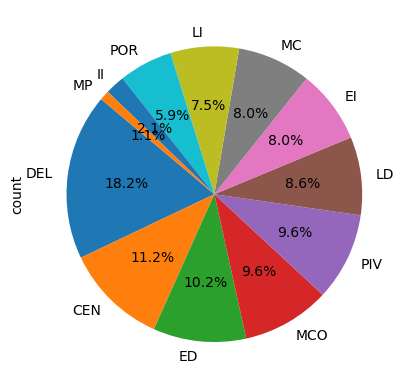

In [15]:
posicines.plot(kind = 'pie', autopct='%1.1f%%', startangle=140)

In [12]:
fichajes_altas = df[df['Tipo de Fichaje']=='Alta']

In [13]:
equipos = fichajes_altas['Equipo'].unique()

In [14]:
contador = 0
for equipo in equipos:
    print("Los fichajes de ", equipo, "son")
    conteo = fichajes_altas[fichajes_altas['Equipo'] == equipo]['Posición'].value_counts()
    print(conteo)

Los fichajes de  Tiburones Rojos de Veracruz son
Posición
Delantero centro        33
Defensa central         31
Mediocentro             18
Pivote                  15
Mediocentro ofensivo    14
Portero                 14
Lateral izquierdo       12
Lateral derecho          7
Interior derecho         6
Extremo izquierdo        6
Mediapunta               5
Defensa                  4
Interior izquierdo       4
Delantero                3
Centrocampista           3
Extremo derecho          2
Name: count, dtype: int64
Los fichajes de  Club Tijuana son
Posición
Delantero centro        60
Defensa central         47
Extremo derecho         35
Mediocentro             27
Lateral derecho         25
Lateral izquierdo       24
Pivote                  23
Extremo izquierdo       23
Portero                 20
Mediocentro ofensivo    17
Delantero                4
Defensa                  3
Interior izquierdo       2
Name: count, dtype: int64
Los fichajes de  Atlas Guadalajara son
Posición
Delantero centro

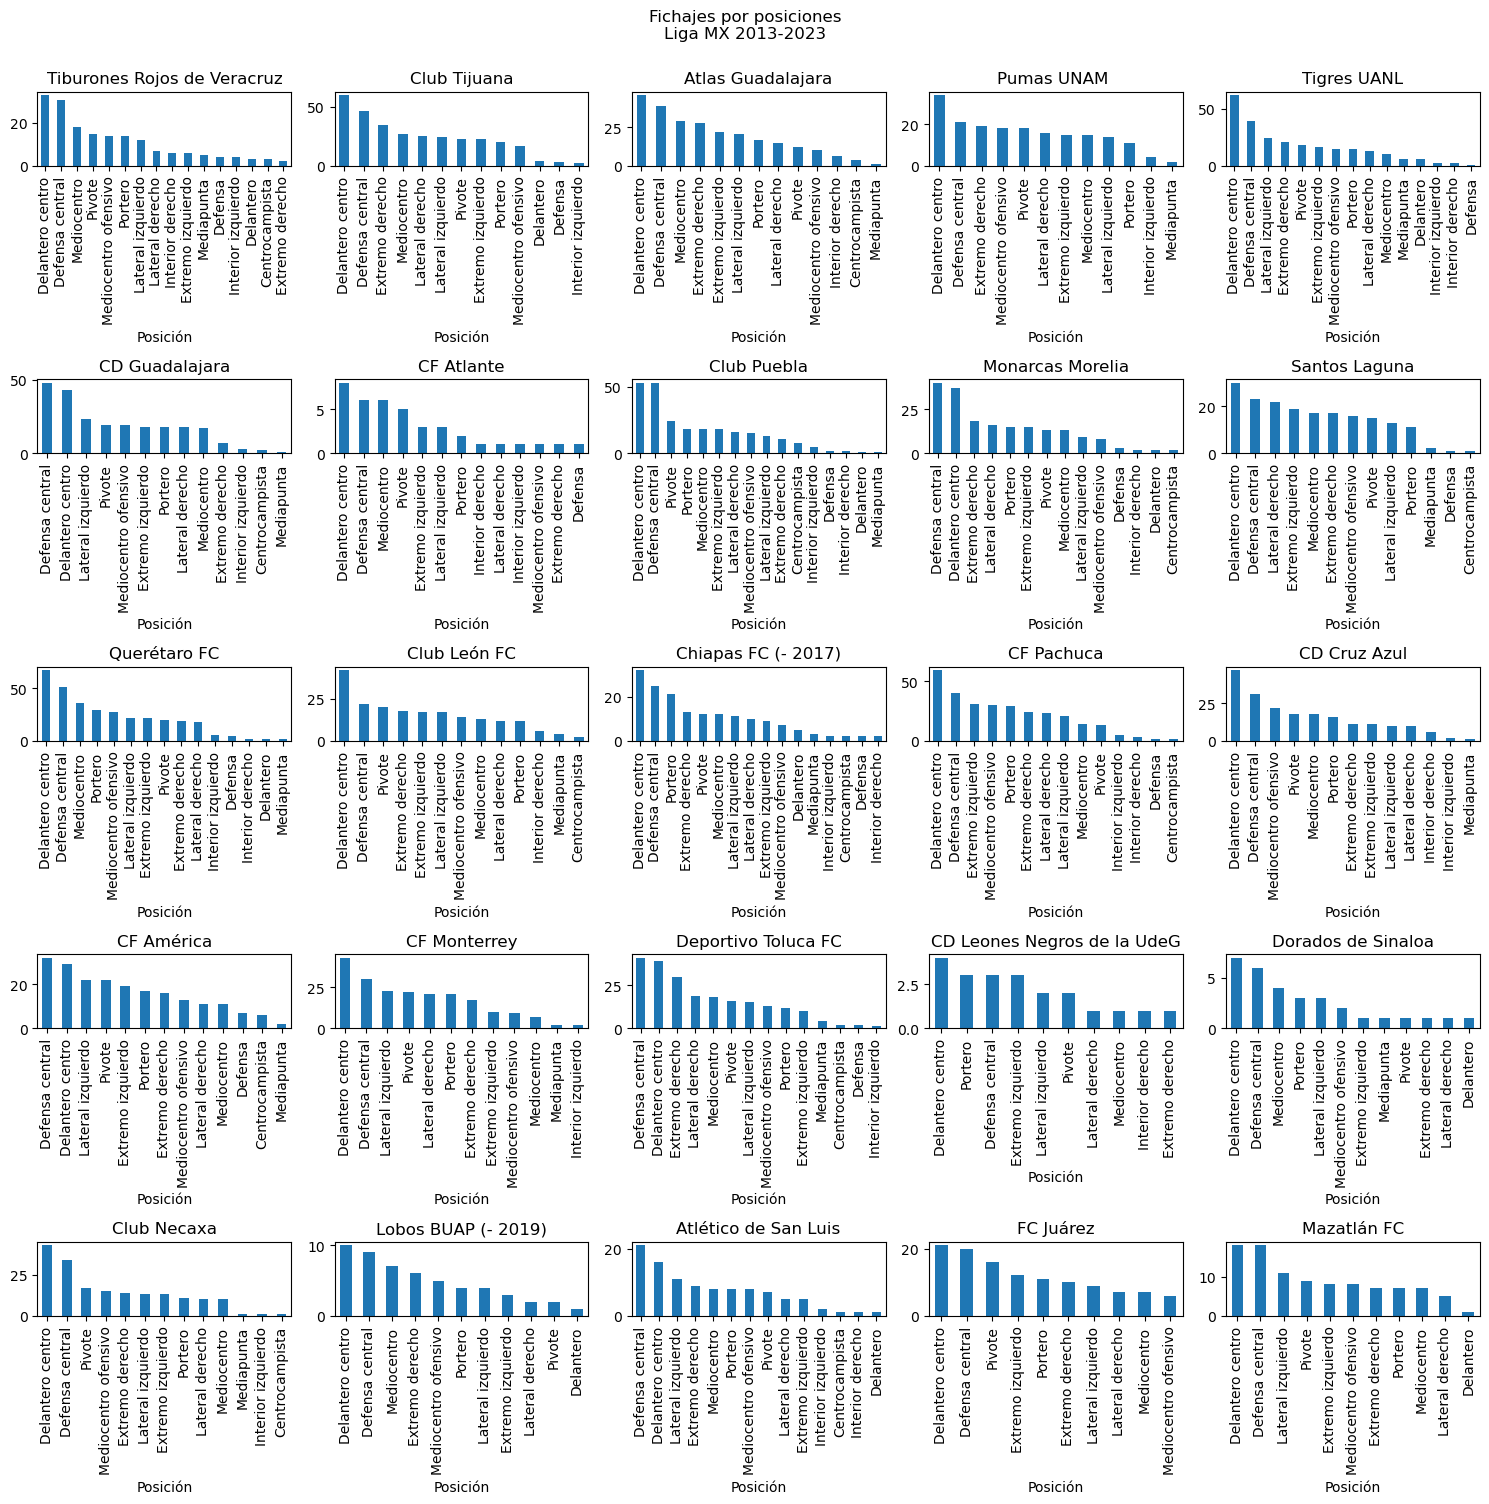

In [15]:
num_filas = len(equipos)
fig, axs = plt.subplots(5, 5, figsize=(15, 15))

for i, equipo in enumerate(equipos):
    conteo = fichajes_altas[fichajes_altas['Equipo'] == equipo]['Posición'].value_counts()
    fila = i // 5
    columna = i % 5
    conteo.plot(kind='bar', ax=axs[fila, columna])
    axs[fila, columna].set_title(equipo)
    #axs.set_title(f"Conteo para valor '{equipo}' en columna2")
    #axs.set_ylabel('Conteo')
    #axs[fila, columna].bar(equipo.index, equipo.values)
    #axs[fila, columna].set_title(f'Serie {i + 1}')
fig.suptitle('Fichajes por posiciones\nLiga MX 2013-2023', y=1)
plt.tight_layout()
plt.show()

In [34]:
fig = plt.figure(figsize=(30,30))
fig.tight_layout()

<Figure size 3000x3000 with 0 Axes>

In [26]:
fichajes_altas.nunique()

Temporada             22
Tipo de Fichaje        1
Equipo                25
Nombre              1825
Edad                  28
Nacionalidad          40
Posición              16
Valor de mercado      89
Último club          550
Coste                331
dtype: int64

In [27]:
fichajes_altas['Último club'].unique()

array(['Catania', 'La Piedad', 'San Luis', 'Pachuca', 'CF América',
       'Club Puebla', 'Caxias-RS', 'Toluca', 'Pumas UNAM ', 'Chiapas FC',
       'Albinegros', 'Cruz Azul', 'Monterrey', 'Pumas Morelos',
       'CF Pachuca U20', 'Veracruz II', 'Lobos BUAP', 'Correcaminos',
       'Santos Laguna', 'Arsenal', 'LA Galaxy Acad.', 'Dorados Sinaloa',
       'Tigres UANL', 'Murciélagos', 'Junior FC', 'Chivas', 'Atlas U20',
       'Atlas II', 'Académicos', 'VfL Bochum', 'Leones Negros', 'Tecos',
       'LDU Quito', 'UNAM Pumas U20', 'Atlante', 'Tiburones Rojos',
       'Monarcas Morelia', 'Lanús', 'Querétaro FC', 'Club Tijuana',
       'León', 'Chivas Rayadas', 'Chivas USA', 'Altamira', 'Irapuato',
       'Colón', 'Tigre', 'Boca Juniors', 'Santos', 'Cerro Porteño',
       'Necaxa', 'Mérida FC', 'Ferro', 'Levante UD', 'Santos Laguna II',
       'River Plate', 'Puebla FC II', 'Sin equipo', 'Puebla FC U20',
       'CD El Nacional', 'CA Morelia U20', 'Toros Neza UTN',
       'Cruz Azul Hid.', 'S

In [25]:
fichajes_altas['Último club'] = fichajes_altas['Último club'].str.replace(' \xa0\xa0', '')

C:\Users\User\AppData\Local\Temp\ipykernel_28344\3580308216.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fichajes_altas['Último club'] = fichajes_altas['Último club'].str.replace(' \xa0\xa0', '')


In [28]:
G = nx.Graph()

In [29]:
for _, row in fichajes_altas.iterrows():
    G.add_edge(row['Último club'], row['Equipo'])

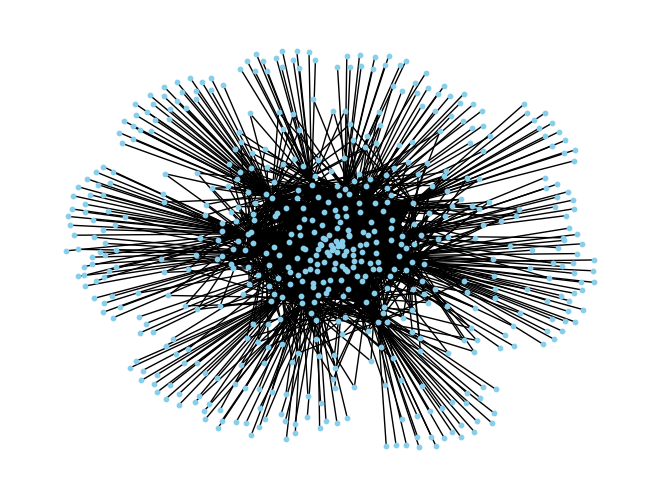

In [30]:
nx.draw_spring(G, with_labels=False, node_color='skyblue', node_size=10, font_size=5, font_weight='bold')
plt.show()

In [33]:
len(G.edges())

1881

In [44]:
fichajes_altas['Año'] = fichajes_altas['Temporada'].str[-4:]

C:\Users\User\AppData\Local\Temp\ipykernel_28344\657781261.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fichajes_altas['Año'] = fichajes_altas['Temporada'].str[-4:]


In [48]:
fichajes_altas['Año'].astype(int)

0       2013
1       2013
2       2013
3       2013
4       2013
        ... 
8996    2023
8997    2023
8998    2023
8999    2023
9000    2023
Name: Año, Length: 4522, dtype: int32

In [106]:
fichajes_altas.head()

,Temporada,Tipo de Fichaje,Equipo,Nombre,Edad,Nacionalidad,Posición,Valor de mercado,Último club,Coste,Año
0,A-2013,Alta,Tiburones Rojos de Veracruz,Cristian Llama,27,Argentina,Mediocentro ofensivo,800 mil €,Catania,Libre,2013
1,A-2013,Alta,Tiburones Rojos de Veracruz,Rafael Murguía,27,México,Delantero centro,125 mil €,La Piedad,?,2013
2,A-2013,Alta,Tiburones Rojos de Veracruz,Isaí Arredondo,30,México,Mediocentro,400 mil €,San Luis,?,2013
3,A-2013,Alta,Tiburones Rojos de Veracruz,Óscar Mascorro,33,México,Defensa central,700 mil €,San Luis,?,2013
4,A-2013,Alta,Tiburones Rojos de Veracruz,Melitón Hernández,30,México,Portero,300 mil €,Pachuca,?,2013


In [113]:
fichajes_altas.drop(columns='Temporada Larga', inplace=True)

C:\Users\User\AppData\Local\Temp\ipykernel_28344\3458145972.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fichajes_altas.drop(columns='Temporada Larga', inplace=True)


In [119]:
fichajes_altas['Año'] = fichajes_altas['Año'].astype(int)

C:\Users\User\AppData\Local\Temp\ipykernel_28344\958191589.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fichajes_altas['Año'] = fichajes_altas['Año'].astype(int)


In [120]:
fichajes_altas['Año'].info()

<class 'pandas.core.series.Series'>
Index: 4522 entries, 0 to 9000
Series name: Año
Non-Null Count  Dtype
--------------  -----
4522 non-null   int32
dtypes: int32(1)
memory usage: 182.0 KB


In [121]:
fichajes_altas['Temporada Larga'] = ""

# Itera sobre cada fila del DataFrame
for indice, fila in fichajes_altas.iterrows():
    temporada = fila['Temporada']
    año = fila['Año']
    
    # Aplica las condiciones y asigna el valor correspondiente a 'Temporada Larga' para cada fila
    if temporada[0] == 'A':
        fichajes_altas.at[indice, 'Temporada Larga'] = str(año) + "-" + str(año + 1)
    else:
        fichajes_altas.at[indice, 'Temporada Larga'] = str(año - 1) + "-" + str(año)

C:\Users\User\AppData\Local\Temp\ipykernel_28344\3759102500.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fichajes_altas['Temporada Larga'] = ""


In [135]:
fichajes_altas[fichajes_altas['Temporada'] == 'C-2024']

,Temporada,Tipo de Fichaje,Equipo,Nombre,Edad,Nacionalidad,Posición,Valor de mercado,Último club,Coste,Año,Temporada Larga


In [127]:
promedios_edades = fichajes_altas.groupby(['Temporada Larga','Equipo'])['Edad'].mean().round(2).reset_index()

In [128]:
plt.figure(figsize=(10, 6))

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

In [94]:
promedios_edades.groupby('Equipo')

In [95]:
promedios_edades

,Temporada,Equipo,Edad
0,A-2013,Atlas Guadalajara,23.58
1,A-2013,CD Cruz Azul,28.40
2,A-2013,CD Guadalajara,26.00
3,A-2013,CF América,25.00
4,A-2013,CF Atlante,28.04
...,...,...,...
391,C-2023,Mazatlán FC,25.00
392,C-2023,Pumas UNAM,27.12
393,C-2023,Querétaro FC,24.08
394,C-2023,Santos Laguna,23.86


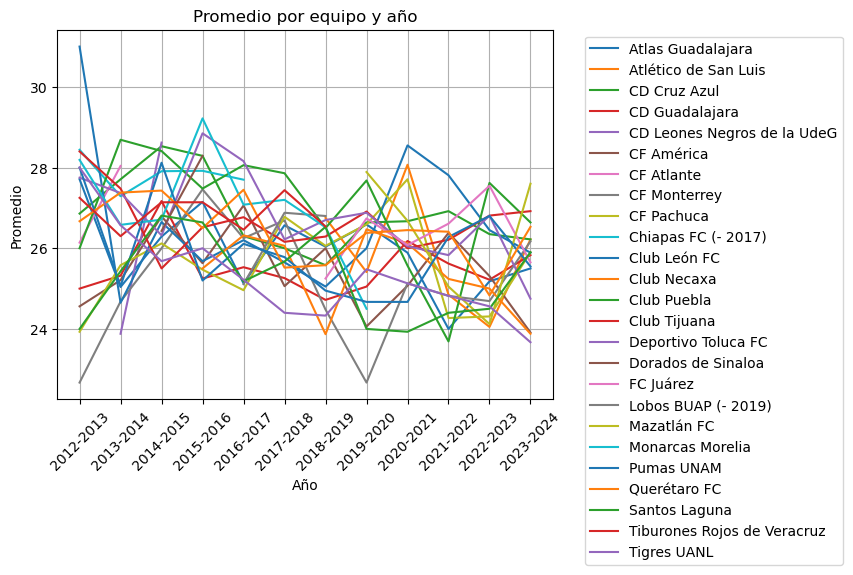

In [130]:
for equipo, datos_equipo in promedios_edades.groupby('Equipo'):
    plt.plot(datos_equipo['Temporada Larga'], datos_equipo['Edad'], label=equipo)
    #ultimo_valor = datos_equipo.iloc[-1]  # Obtener el último valor de promedio para la etiqueta
    #plt.text(ultimo_valor['Año'], ultimo_valor['Edad'], equipo, fontsize=8, ha='right')
    
plt.xlabel('Año')
plt.ylabel('Promedio')
plt.title('Promedio por equipo y año')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.xticks(rotation=45)
plt.grid()
plt.show()

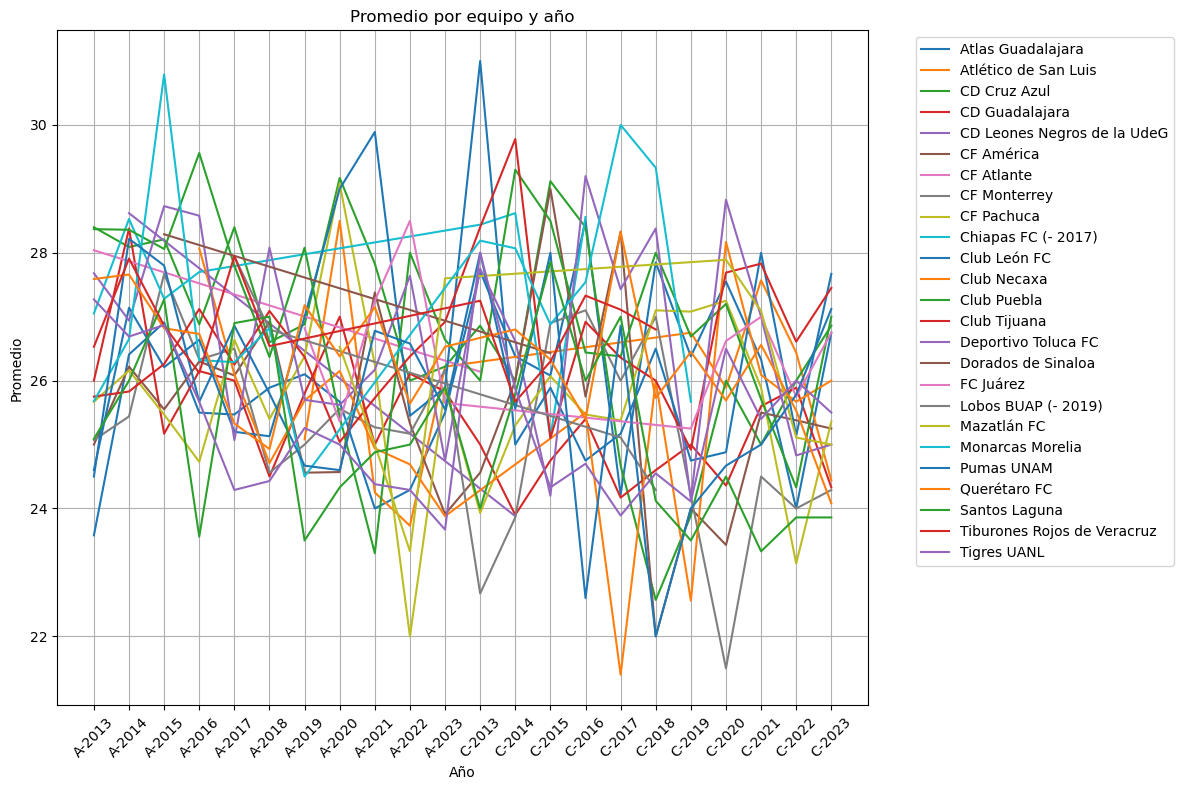

In [103]:
fig, ax = plt.subplots(figsize=(12, 8))

for equipo, datos_equipo in promedios_edades.groupby('Equipo'):
    ax.plot(datos_equipo['Temporada'], datos_equipo['Edad'], label=equipo)
    #ultimo_valor = datos_equipo.iloc[-1]  # Obtener el último valor de promedio para la etiqueta
    #plt.text(ultimo_valor['Año'], ultimo_valor['Edad'], equipo, fontsize=8, ha='right')
    
ax.set_xlabel('Año')
ax.set_ylabel('Promedio')
ax.set_title('Promedio por equipo y año')
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.xticks(rotation=45)
plt.tight_layout()
plt.grid()
plt.show()

In [140]:
promedios_edades[promedios_edades['Equipo'] == 'FC Juárez']

,Temporada Larga,Equipo,Edad
124,2018-2019,FC Juárez,25.25
144,2019-2020,FC Juárez,26.74
163,2020-2021,FC Juárez,26.08
181,2021-2022,FC Juárez,26.61
199,2022-2023,FC Juárez,27.55
217,2023-2024,FC Juárez,25.65
